***Vorlesung 'Syntax natürlicher Sprachen', WS 2019/20***

---
# Übung 13

In [2]:
from sklearn.metrics import accuracy_score, precision_score,\
    recall_score, f1_score
from exercises_13 import *
from questions import aufgabe
import nltk

--- 
## Aufgabe 1: Evaluationsmetriken

#### Betrachten Sie folgende Daten. Es handelt sich um ein vereinfachtes Tagging-Schema fürs Chunking, bei dem nur zwischen „Teil einer NP“ (`1`) und „nicht Teil einer NP“ (`0`) unterschieden wird.

In [3]:
ground_truth = [1,0,1,0,0,1,1,1,1,0]
chunker1     = [1,1,1,0,1,0,1,1,1,1]
chunker2     = [1,0,1,0,0,0,0,0,1,0]
chunker3     = [0,0,0,0,0,1,1,1,1,0]

#### Berechnen Sie für jeden der Chunker Accuracy, Precision, Recall und F1-Score zunächst per Hand und überprüfen Sie dann Ihr Ergebnis mit dem folgenden Code.

In [4]:
def evaluate(chunker):
    print(
        "Accuracy:",
        "{:.2f}".format(accuracy_score(ground_truth, chunker))
    )
    print(
        "Precision:",
        "{:.2f}".format(precision_score(ground_truth, chunker))
    )
    print(
        "Recall:",
        "{:.2f}".format(recall_score(ground_truth, chunker))
    )
    print(
        "F1-Score:",
        "{:.2f}".format(f1_score(ground_truth, chunker))
    )

In [5]:
evaluate(chunker1)

Accuracy: 0.60
Precision: 0.62
Recall: 0.83
F1-Score: 0.71


In [6]:
evaluate(chunker2)

Accuracy: 0.70
Precision: 1.00
Recall: 0.50
F1-Score: 0.67


In [7]:
evaluate(chunker3)

Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1-Score: 0.80


---
## Aufgabe 2: Herunterladen von Ressourcen

#### Das CoNLL 2000 Korpus ist ein POS- und Chunk-getaggtes Korpus (IOB- Format), das in ein Test- und ein Trainingskorpus aufgeteilt ist. Wir werden es zum Training und zur Evaluation von Chunk-Parsern verwenden. Laden Sie es sich dafür zunächst über die Ressource `corpora/conll2000` herunter.

In [8]:
# nltk.download()

#### Wenn Sie es erfolgreich heruntergeladen haben, können Sie folgendermaßen darauf zugreifen:

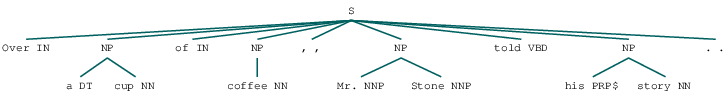

In [9]:
from nltk.corpus import conll2000
conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]

#### Das `chunk_types`-Argument dient der Auwahl von Chunk-Typen (in diesem Beispiel Nominalphrasen).

--- 
## Aufgabe 3: Chunking mit regulären Ausdrücken

#### Erstellen Sie einen einfachen `RegexpParser`, der für Nominalphrasen charakteristische Tags zu NPs zusammenfasst. Solche charakteristischen Tags sind z.B. Kardinalzahlen (`CD`), Artikel (`DT`), Adjektive (`JJ`, `JJR`, `JJS`) und natürlich Substantive (`NN`, `NNS`, `NNP`, `NNPS`).

#### Weitere interessante Tags wären `PDT` (z.B. *both*, *a lot of*), `POS` (*'s*), `PRP` (Personalpronomen), `PRP$`(Possessivpronomen).

In [10]:
regex = """
    NP: {(<DT>|<PRP\$>|<PDT>|<POS>)?<CD>?<JJ[RS]?>*<NNS?>}
        {<NNPS?>+}
        {<PRP>}
"""

#### Evaluieren Sie Ihren Parser anschließend auf dem CoNLL 2000 Korpus:

In [11]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
cp = nltk.RegexpParser(regex)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  81.4%%
    Precision:     59.0%%
    Recall:        64.5%%
    F-Measure:     61.6%%


---
## Aufgabe 4: Komplexität und Sprachverarbeitung

---
### Aufgabe 4 a:

#### Betrachten Sie folgenden Satz:
- *My brother opened the window the maid the janitor uncle bill had hired had married had closed.*

#### und beantworten Sie hierzu die folgenden Fragen.

In [12]:
aufgabe(blatt13_6a)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um was für ein Sprachkonstrukt handelt es sich?…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welchem Typ muss eine Grammatik mindestens genü…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welche Rekursionstiefe hat der Satz?</h4>'), H…

---
### Aufgabe 4 b:

#### Betrachten Sie folgenden Satz:

- *The complex houses married and single soldiers and their families.*

#### und beantworten Sie hierzu die folgenden Fragen.

In [13]:
aufgabe(blatt13_6b)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um was für ein Sprachkonstrukt handelt es sich?…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Ist der Satz ambig?</h4>', layout=Layout(justif…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Sind Teile des Satzes ambig?</h4>', layout=Layo…

---

## Aufgabe 5: Evaluationsmetriken 2.0

--- 
### Aufgabe 5 a:

*Anmerkung: true = korrekt vorhergesagt, positive/negative = 1/0*

In [14]:
aufgabe(blatt13_7)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche der Formeln berechnen Precision, Recal…

---
### Aufgabe 5 b:

#### Berechnen Sie nun mit dem Wissen aus der vorherigen Teilaufgabe für jeden der unten angegebenen Chunker Accuracy, Precision, Recall und F1-Score zunächst per Hand und überprüfen Sie dann Ihr Ergebnis mit dem zugehörigen Code.

#### Bei den Daten handelt sich um ein vereinfachtes Tagging-Schema für das Chunking, bei dem nur zwischen „Teil einer NP“ (`1`) und „nicht Teil einer NP“ (`0`) unterschieden wird.

In [15]:
ground_truth = [1,0,1,0,0,1,1,1,1,0]
chunker4     = [0,1,1,0,1,0,1,1,1,1]
chunker5     = [1,0,1,1,0,0,0,0,1,0]
chunker6     = [0,1,1,0,0,1,1,1,1,0]

In [16]:
def evaluate(chunker):
    print(
        "Accuracy:",
        "{:.2f}".format(accuracy_score(ground_truth, chunker))
    )
    print(
        "Precision:",
        "{:.2f}".format(precision_score(ground_truth, chunker))
    )
    print(
        "Recall:",
        "{:.2f}".format(recall_score(ground_truth, chunker))
    )
    print(
        "F1-Score:",
        "{:.2f}".format(f1_score(ground_truth, chunker))
    )

In [17]:
evaluate(chunker4)

Accuracy: 0.50
Precision: 0.57
Recall: 0.67
F1-Score: 0.62


In [18]:
evaluate(chunker5)

Accuracy: 0.60
Precision: 0.75
Recall: 0.50
F1-Score: 0.60


In [19]:
evaluate(chunker6)

Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1-Score: 0.83


---
## Aufgabe 6: Chunking

#### Lesen Sie NLTK-Kapitel 7.2 (http://www.nltk.org/book/ch07.html#chunking) und beantworten Sie dazu die folgenden Fragen.

In [20]:
aufgabe(blatt13_8)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wo ist der Unterschied zwischen Chunks und Ph…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wozu sind Tag Pattern ähnlich?</h4>', layout=La…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was kann mit Chinking erreicht werden?</h4>')…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Klammern zeigen Chinking an?</h4>', layo…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Klammern zeigen Chunking an?</h4>', layo…

In [21]:
aufgabe(blatt13_9)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wodurch kann mit einem RegexpParser eine hier…